<img style="float: left;" src="../earth-lab-logo-rgb.png" width="150" height="150">

# Earth Data Science Corps Summer 2020

![Colored Bar](../colored-bar.png)

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Explore the distribution of values within a raster using histograms.
* Plot a histogram of a raster dataset in **Python** using **matplotlib**.

</div>

In the last lesson, you learned about three key attributes of a raster dataset:

1. Spatial resolution
2. Spatial extent and
3. Coordinate reference systems

In this lesson, you will learn how to use histograms to better understand the
distribution of your data.


## Open Raster Data in Python

To work with raster data in **Python**, you can use the **rasterio** and **numpy** packages.
Remember you can use the **rasterio context manager** to import the raster object into **Python**.

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.plot as ep

# Get data and set wd
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

As you did in the previous lessons, you can open your raster data using `rio.open()`.

In [2]:
# Define relative path to file
lidar_dem_path = os.path.join("data", "colorado-flood", "spatial", 
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")

# Open data and assign negative values to nan
with rio.open(lidar_dem_path) as src:
    lidar_dem_im = src.read(1, masked=True)

# View object dimensions
lidar_dem_im.shape

(2000, 4000)


## Raster Histograms - Distribution of Elevation Values


The histogram below represents the distribution of pixel elevation values in your
data. This plot is useful to:

1. Identify outlier data values
2. Assess the min and max values in your data
3. Explore the general distribution of elevation values in the data - i.e. is the area generally flat, hilly, is it high elevation or low elevation.

To begin, you will look at the shape of your lidar array object

In [3]:
# The .ravel method turns an 2-D numpy array into a 1-D vector
print(lidar_dem_im.shape)
print(lidar_dem_im.ravel().shape)

(2000, 4000)
(8000000,)


If your array has nan values in it, it's best to remove the nan values before trying to plot a histogram.
To do this, you would:

1. flatten the data so it can be coerced into a histogram using `.ravel()`
2. remove nan values `lidar_dem_hist[~np.isnan(lidar_dem_hist)]`

However, since you used `masked=True` while opening the raster, the nan values have already been removed by the masking operation. 

Once you have cleaned up the data you can plot a histogram.

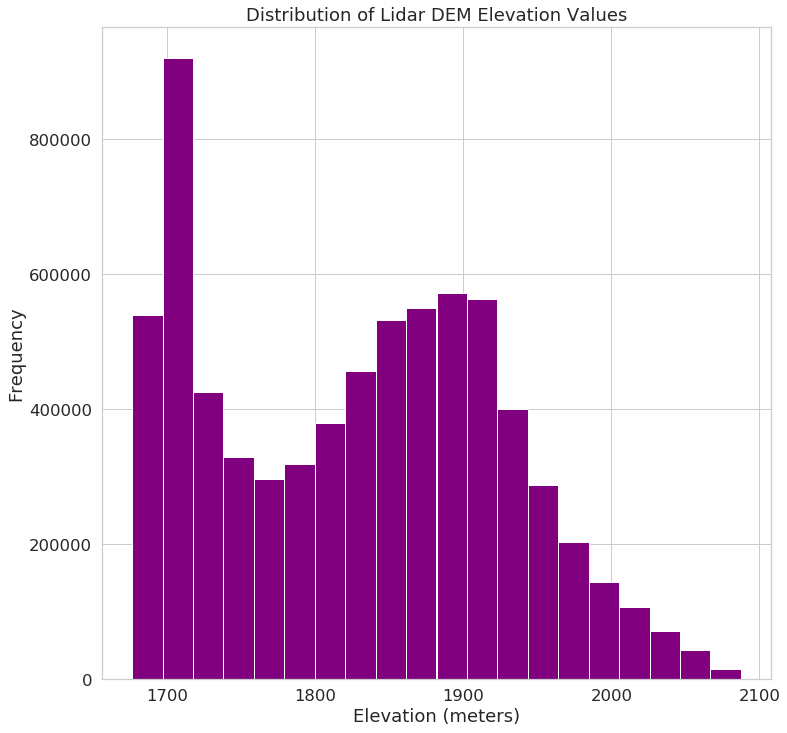

In [4]:
ep.hist(lidar_dem_im, colors=['purple'],
        title="Distribution of Lidar DEM Elevation Values",
        xlabel='Elevation (meters)',
        ylabel='Frequency')
plt.show()


## What Does a Histogram Tell You?

A histogram shows us how the data are distributed. Each bin or bar in the plot
represents the number or frequency of pixels that fall within the range specified
by the bin.

You can use the `bins=` argument to specify fewer or more breaks in your histogram.
Note that this argument does not result in the exact number of breaks that you may
want in your histogram.


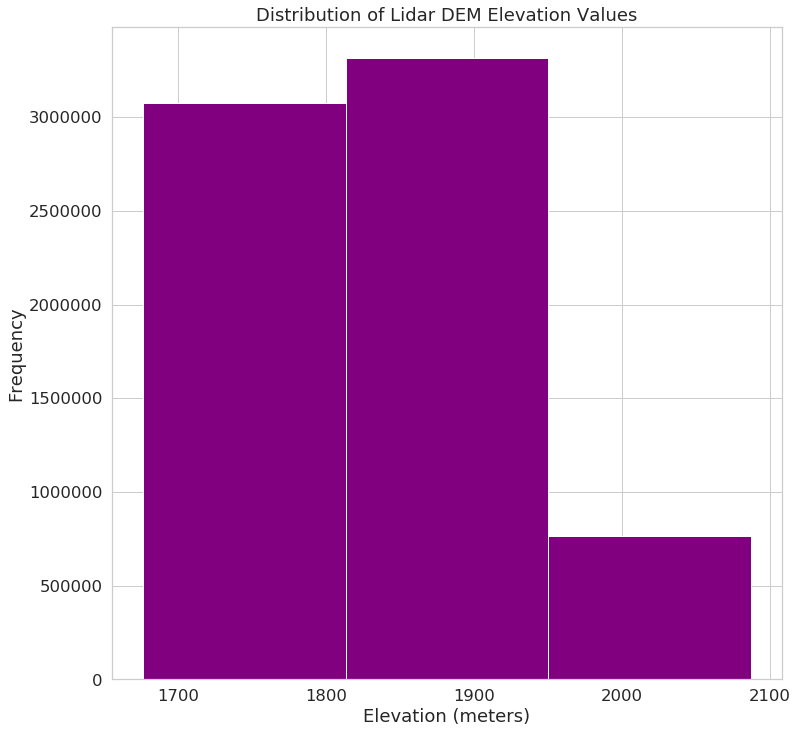

In [5]:
ep.hist(lidar_dem_im, colors=['purple'],
        title="Distribution of Lidar DEM Elevation Values",
        xlabel='Elevation (meters)',
        ylabel='Frequency',
        bins=3)
plt.show()

Alternatively, you can specify specific break points that you want **Python** to use when it
bins the data.

`bins=[1600, 1800, 2000, 2100]`

In this case, **Python** will count the number of pixels that occur within each value range
as follows:

* bin 1: number of pixels with values between 1600-1800
* bin 2: number of pixels with values between 1800-2000
* bin 3: number of pixels with values between 2000-2100


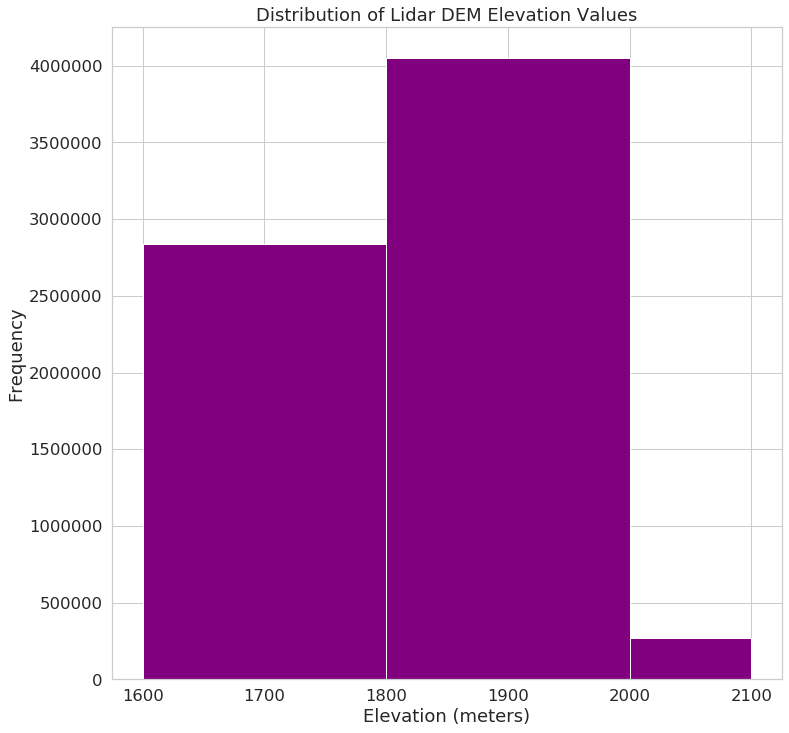

In [6]:
ep.hist(lidar_dem_im,
        bins=[1600, 1800, 2000, 2100],
        colors=['purple'],
        title="Distribution of Lidar DEM Elevation Values",
        xlabel='Elevation (meters)',
        ylabel='Frequency')
plt.show()